# Data Science I - Data Challenge 5

**Author:** Pratik Mistry

**Date:** 30 November 2020

**GitHub Link:** https://github.com/pratikmistry96/Data-Science-I-Data-Challenges/tree/master/Data_Challenge_5

# Introduction

This data challenge will take data from AirBnB listings from Montreal, CA from the 19 October 2020 and create five paper quality figures that tell a meaningful story to the reader.

The figures need to adhere to the following requirements:

- Use at least five distinct plot types (i.e. histogram, scatterplot, barplot, stacked barplot ...)
- At least two figures should use a change of color from the default matplotlib or seaborn colors
- At least one figure should use 'pd.merge' to join two of the dataframes together
- All plots should have a title, axis labels, and legend titles
- Variable names are not acceptable for axis labels and legend labels
- Figure captions should be three to five sentences and describe the figure and trends in the data.

# Load Necessary Libraries

In [80]:
import matplotlib.pyplot as plt # Load pyplot from matplotlib package as plt
import seaborn as sns # Load seaborn package
import numpy as np # Load numpy package
import pandas as pd # Load pandas package

# Load AirBnB Datasets

Load the listings and reviews datasets for Montreal from the following site: http://insideairbnb.com/get-the-data.html

In [81]:
listings = pd.read_csv('data/listings.csv.gz',compression='gzip') # Load full listings data from listings.csv.gz
reviews = pd.read_csv('data/reviews.csv.gz',compression='gzip') # Load full review data from reviews.csv.gz

# Clean Datasets

Clean the datasets to only include the most relevant columns.

Converts the price from string to a float

Extracts the year from the data and adds it to a new columns

In [1]:
listings = listings.loc[:,['id','name','host_id','host_name','host_is_superhost','neighbourhood_cleansed','price','number_of_reviews']] # Extract only the necessary columns
listings.loc[:,'neighbourhood'] = listings.loc[:,'neighbourhood_cleansed'] # Rename neighbourhood_cleansed to neighbourhood
listings = listings.drop('neighbourhood_cleansed',1) # Drop neighbourhood_cleansed column
listings.loc[:,'price'] = listings.loc[:,'price'].str.replace('$','').str.replace(',','').astype(float) # Convert price column from string to float

reviews = reviews.loc[:,['listing_id','date']] # Extract only listing id and date from reviews data
reviews.loc[:,'year'] = reviews.loc[:,'date'].str.split('-',n = 1,expand=True)[0].astype(int) # Pull year from date column and convert to int

NameError: name 'listings' is not defined

# Plots:

The following graphs will help guide one's decision on which AirBnB to rent in Montreal based on total reviews and range of prices for AirBnBs in those neighborhoods

## 1) Top 10 Neighbourhoods with Most Number of Reviews

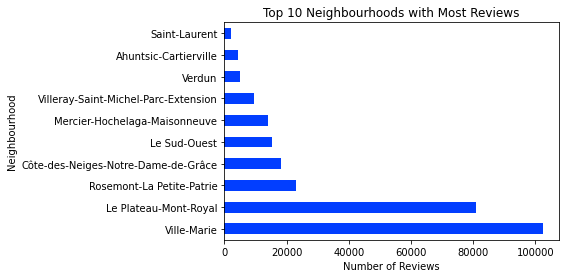

In [125]:
# Group data by neighbourhood and sum all the rows, sort number of reviews in ascending order, and extract top 10 neighbourhoods with most number of reviews
top_10_reviews = listings.groupby('neighbourhood').sum().sort_values('number_of_reviews', ascending = False).head(n=10)
sns.set_palette('bright') # Set the color palette to pastel
fig_1 = top_10_reviews['number_of_reviews'].plot.barh() # Create a bar plot with neighbourhoods on y-column
fig_1.set_xlabel('Number of Reviews') # Label the x axis
fig_1.set_ylabel('Neighbourhood') # Label the y axis
fig_1.set_title('Top 10 Neighbourhoods with Most Reviews') # Create the title
plt.show() # Show plot

**Figure 1:** This figure contains the top 10 neighbourhoods in Montreal with AirBnB listings with the most number of reviews over a 10 year time period. From this plot, we see that the neighbourhoods of Le Plateau-Mont-Royal and Ville-Marie have the most number of reviews. This graph suggests it may be wise to look into these neighbourhoods when picking an AirBnB.

## 2) Average Listing Price for Top 10 Neighbourhoods with Most Reviews

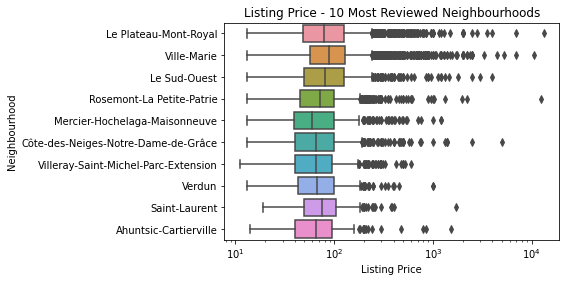

In [93]:
top_10_listings = listings[listings['neighbourhood'].isin(top_10_reviews.index)] # Create a new data frome from lisitngs data frame filtered by the top 10 neighbourhoods
sns.set_color_codes('pastel') # Set color palette to mako
fig_2 = sns.boxplot(y = 'neighbourhood', x = 'price', data = top_10_listings) # Create a boxplot with neighbourhoods on y-axis and prices on x-axis
fig_2.set_xscale("log") # Log scale the x-axis for better visualization
fig_2.set_xlabel('Listing Price') # Label the x axis
fig_2.set_ylabel('Neighbourhood') # Label the y axis
fig_2.set_title('Listing Price - 10 Most Reviewed Neighbourhoods') # Set the title
plt.show() # Show the plot

**Figure 2:** A larger number of reviews for a neighbourhood does not necessarily imply higher or lower prices. This boxplot shows the distribution of listing prices in the neighbourhoods extracted from Figure 1. From this figure, there is no obvious difference between the listing prices between different neighbourhoods. In this scenario, it makes sense to choose the neighbourhood of Ville-Marie to look for listings.

## 3) Relationship between price and number of reviews in Ville-Marie

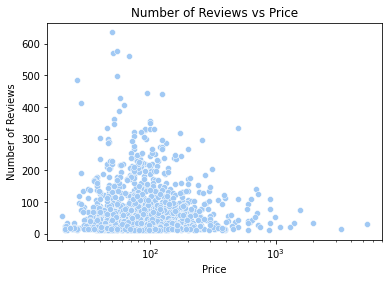

In [115]:
villemarie_airbnb = top_10_listings[top_10_listings['neighbourhood'].isin(['Ville-Marie'])] # Extract only the Ville-Marie neighbourhood from the data frame
villemarie_airbnb = villemarie_airbnb[villemarie_airbnb['number_of_reviews']>10] # Pull only listings with reviews greater than 10
sns.set_color_codes('pastel') # Change the palette to pastel
fig_3 = sns.scatterplot(x = 'price', y = 'number_of_reviews', data = villemarie_airbnb) # Plot a scatterplot of number of reviews vs listing price
fig_3.set_xscale("log") # Log scale the x axis or the price axis
fig_3.set_xlabel('Price') # label the x axis
fig_3.set_ylabel('Number of Reviews') # Label the y axis
fig_3.set_title('Number of Reviews vs Price') # Add a title
plt.show() # Show plot

**Figure 3:** A deeper dive into the relationship between the number of reviews (greater than 10 per listing) and listing price in the Ville-Marie neighbourhood does not show a signficant trend or association between number of reviews and listing price.

## 4) Distribution of Reviews by Host Status

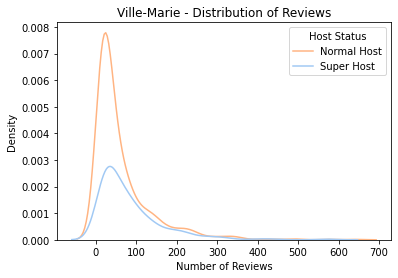

In [99]:
fig_4 = sns.kdeplot(data = villemarie_airbnb, x = 'number_of_reviews', hue = 'host_is_superhost') # Create a density plot of the number of reviews colored by host status
fig_4.set_xlabel('Number of Reviews') # Label x axis
fig_4.set_title('Ville-Marie - Distribution of Reviews') # Add the title
fig_4.legend(title='Host Status', loc='upper right', labels=['Normal Host', 'Super Host']) # Change legend text
sns.set_color_codes('pastel') # Set the color palette
plt.show() # Show plot

**Figure 4:** When choosing a listing and looking at reviews, maybe a super host or normal host have different distributions in the number of reviews over 10 years. From this graph, the distributions for normal host and super hosts are approximately the same. Meaning there is no inclination of choosing a listing hosted by a superhost or not.

# 5) Number of Reviews from 2010 to 2020 in Ville-Marie

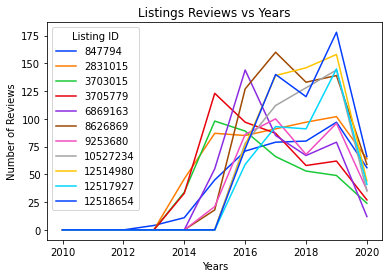

In [132]:
montreal_airbnb = pd.merge(listings,reviews,how='inner',left_on='id',right_on='listing_id') # Merge the listings data set and reviews data set
ville_marie_reviews = montreal_airbnb[montreal_airbnb['neighbourhood'] == 'Ville-Marie'] # Filter the datset by the Ville-Marie neighbourhood
ville_marie_reviews = ville_marie_reviews.loc[:,['year','id']] # Extract the year and listing id
ville_marie_reviews['count'] = 0 # Create a new column called count
ville_marie_count = ville_marie_reviews.groupby(['year','id']).count().unstack(1).fillna(0) # Group the data by listing id and year and count the number of instances and fill na values to 0
ville_marie_count.columns = ville_marie_count.columns.droplevel() #Remove one of the levels from the dataset columns
ville_marie_sum = ville_marie_count.sum() # Sum all the reviews for the listings over all the years
sns.set_color_codes('colorblind') # Set the color palette to colorblind
fig_5 = ville_marie_count[ville_marie_sum[ville_marie_sum>400].index].plot() # Create a line plot of listings with over 400 reviews over a 10 year period (40 reviews/year)
fig_5.set_xlabel('Years') # Label x axis
fig_5.legend(title = "Listing ID")
fig_5.set_ylabel('Number of Reviews') # Label y axis
fig_5.set_title('Listings Reviews vs Years') # Add title
plt.show() # Show plot

**Figure 5:** This plot has the number of reviews across the years from 2010 to 2020, so we can monitor the fluctuations in reviews over the years. This can help us decide which listing to choose when traveling to Montreal. Note that not all the listings start at the same years. All listings have a ramp up to a reputation with some yearly flucutations. However, due to the COVID-19 pandemic, fewer people were renting listings, so the number of reviews have dropped in 2020. From this graph, I'd look at these listings and compare the prices and layout to see which is in my budget and match my preferences.